In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


### Reading Images

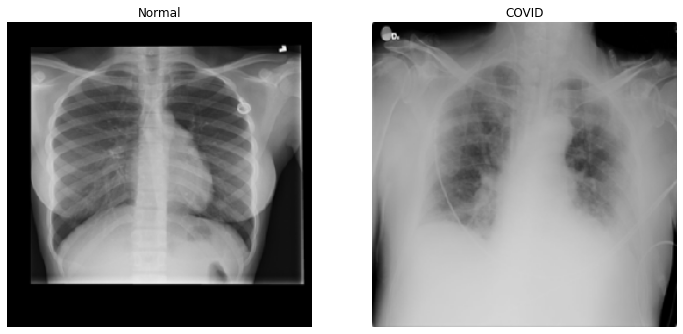

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=2,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img('drive/MyDrive/data2/Normal/Normal-1.png', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Normal')

ax_2 = ax[1]
img2 = load_img('drive/MyDrive/data2/COVID/COVID-1.png', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('COVID')
plt.show()

In [ ]:
images = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory = 'drive/MyDrive/data2',
        class_mode = 'binary',
        target_size = (128, 128),
        batch_size = 7232) 

Found 7232 images belonging to 2 classes.


### Splitting Images and Labels

In [ ]:
images, labels = next(images)

In [ ]:
pd.DataFrame(labels).value_counts()

1.0    3616
0.0    3616
dtype: int64

### Train Test Split

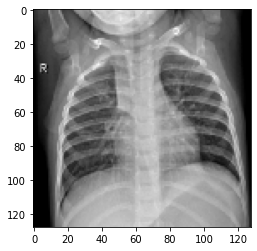

In [ ]:
plt.imshow(images[0])

In [ ]:
labels[0]

1.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state = 1)

In [12]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (5785, 128, 128, 3)
y_train shape (5785,)
x_test shape (1447, 128, 128, 3)
y_test shape (1447,)


In [14]:
x_train[0].shape

(128, 128, 3)

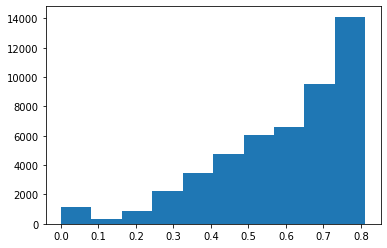

In [15]:
plt.hist(x_train[0].reshape(128*128*3))
plt.show()

In [16]:
x_train = x_train.reshape(5785, 49152)
x_test = x_test.reshape(1447, 49152)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int')
y_test = y_test.astype('int')


## Sequential Model

In [17]:
model = Sequential()
model.add(Dense(512, input_shape=(49152,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
# compiling the sequential model
model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [19]:
# Training the model
model1 = model.fit(x_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))

Epoch 1/20
46/46 - 3s - loss: 4.4287 - accuracy: 0.5908 - val_loss: 0.5167 - val_accuracy: 0.7339 - 3s/epoch - 58ms/step
Epoch 2/20
46/46 - 2s - loss: 0.5101 - accuracy: 0.7404 - val_loss: 0.4583 - val_accuracy: 0.7733 - 2s/epoch - 35ms/step
Epoch 3/20
46/46 - 2s - loss: 0.4672 - accuracy: 0.7734 - val_loss: 0.5330 - val_accuracy: 0.7402 - 2s/epoch - 34ms/step
Epoch 4/20
46/46 - 2s - loss: 0.4833 - accuracy: 0.7554 - val_loss: 0.4269 - val_accuracy: 0.7706 - 2s/epoch - 35ms/step
Epoch 5/20
46/46 - 2s - loss: 0.4358 - accuracy: 0.7815 - val_loss: 0.4215 - val_accuracy: 0.7830 - 2s/epoch - 35ms/step
Epoch 6/20
46/46 - 2s - loss: 0.4527 - accuracy: 0.7604 - val_loss: 0.3943 - val_accuracy: 0.7947 - 2s/epoch - 35ms/step
Epoch 7/20
46/46 - 2s - loss: 0.4391 - accuracy: 0.7838 - val_loss: 0.3761 - val_accuracy: 0.8037 - 2s/epoch - 36ms/step
Epoch 8/20
46/46 - 2s - loss: 0.4178 - accuracy: 0.7843 - val_loss: 0.3831 - val_accuracy: 0.7851 - 2s/epoch - 37ms/step
Epoch 9/20
46/46 - 2s - loss: 0.

In [20]:
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)
print('Train: ',results_train)
print('Test: ',results_test)

46/46 [==============================] - 0s 6ms/step - loss: 0.4442 - accuracy: 0.7982
Train:  [0.4292852282524109, 0.819187581539154]
Test:  [0.4442138373851776, 0.79820317029953]


In [21]:
np.around(model.predict(x_test)).astype('int')

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [22]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

In [23]:
confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int'))

array([[635,  86],
       [206, 520]])

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, np.around(model.predict(x_test)).astype('int')).ravel()
tn, fp, fn, tp

(635, 86, 206, 520)